In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv(r"C:\Users\21650\Downloads\train.csv\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()
print("dataframe dimensions: ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#delete row ID column as it's useless here
df.drop(columns=["Row ID","Country"],inplace=True)

In [113]:
#convert Postal Code column from float to string
df["Postal Code"]=df.loc[df["Postal Code"].isna()==False,"Postal Code"].apply(lambda x: str(int(x)))
print(df["Postal Code"].dtype)
df[["Postal Code"]].head()

object


,Postal Code
0,42420
1,42420
2,90036
3,33311
4,33311


In [114]:
#Replace missing values in Postal Code column with mode
print(df["Postal Code"].value_counts())
df["Postal Code"].fillna(df["Postal Code"].mode()[0],inplace=True)

Postal Code
10035    253
10024    225
10009    220
94122    195
10011    193
        ... 
93405      1
8401       1
60067      1
44035      1
72762      1
Name: count, Length: 626, dtype: int64


C:\Users\21650\AppData\Local\Temp\ipykernel_5788\2826296110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(df["Postal Code"].mode()[0],inplace=True)


In [115]:
#check for empty cells
int(df["Postal Code"].isnull().sum())

0

In [116]:
df["Order Date"]=pd.to_datetime(df["Order Date"],format="%d/%m/%Y")
df["Ship Date"]=pd.to_datetime(df["Ship Date"],format="%d/%m/%Y")

In [117]:
df.sort_values(by=["Order Date","Ship Date","Sales"],inplace=True)

In [118]:
#let's generate a bolean feature "On Time Delivery" where a delivery delay under 3 days is considered on-time
df["On Time"]=(df["Ship Date"]-df["Order Date"]).dt.days<5

<h2><b>EDA<b><h2>

C:\Users\21650\AppData\Local\Temp\ipykernel_31876\1395494137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x="Category",palette="viridis")


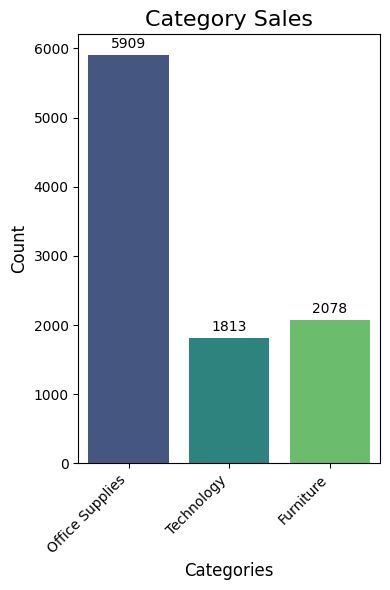

In [109]:
plt.figure(figsize=(4,6))
ax=sns.countplot(data=df,x="Category",palette="viridis")

plt.title("Category Sales",fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Categories",fontsize=12)
plt.ylabel("Count",fontsize=12)
# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()    
plt.show()

C:\Users\21650\AppData\Local\Temp\ipykernel_31876\6546219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x="Sub-Category",palette="viridis")


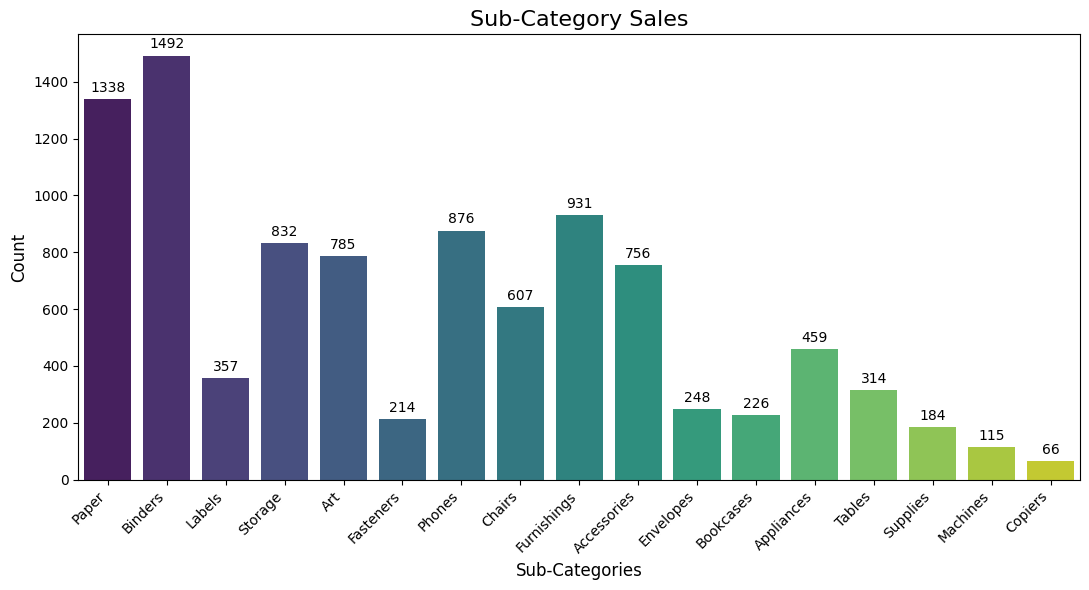

In [103]:
plt.figure(figsize=(11,6))
ax=sns.countplot(data=df,x="Sub-Category",palette="viridis")
plt.xticks(rotation=45,ha='right')
plt.title("Sub-Category Sales",fontsize=16)
plt.xlabel("Sub-Categories",fontsize=12)
plt.ylabel("Count",fontsize=12)
# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()    
plt.show()

1849  unique products.


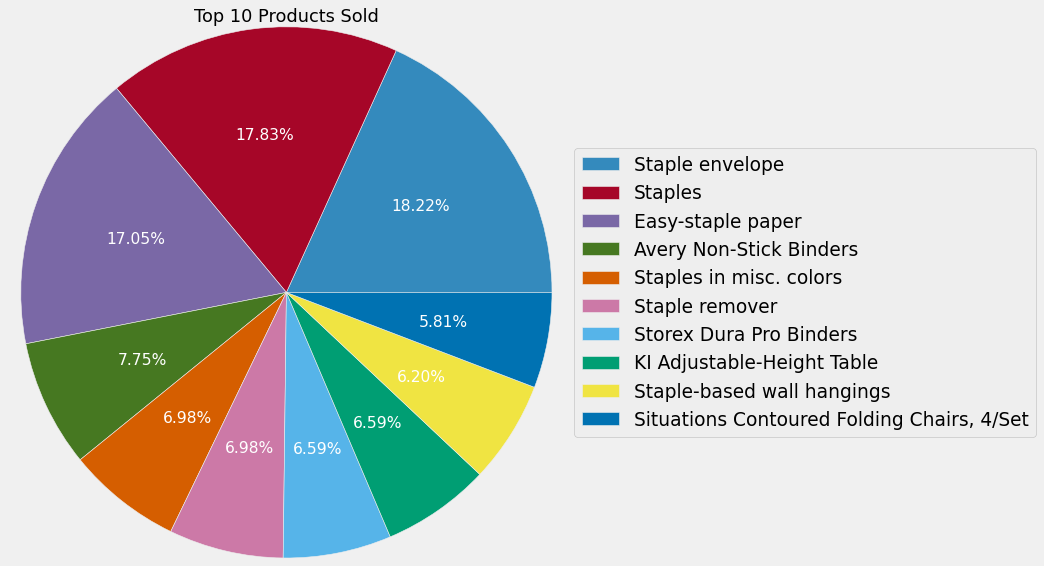

In [179]:
print(len(df["Product Name"].unique())," unique products.")
product_count=df["Product Name"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.style.use("bmh")
ax=plt.pie(x=product_count.values,autopct="%.2f%%")
legend=plt.legend(product_count.index, loc="center left", bbox_to_anchor=(1, 0.5))
for text in legend.get_texts():
    text.set_color('black')
plt.title("Top 10 Products Sold",fontsize=16,color="black")
plt.axis('equal')
plt.show()

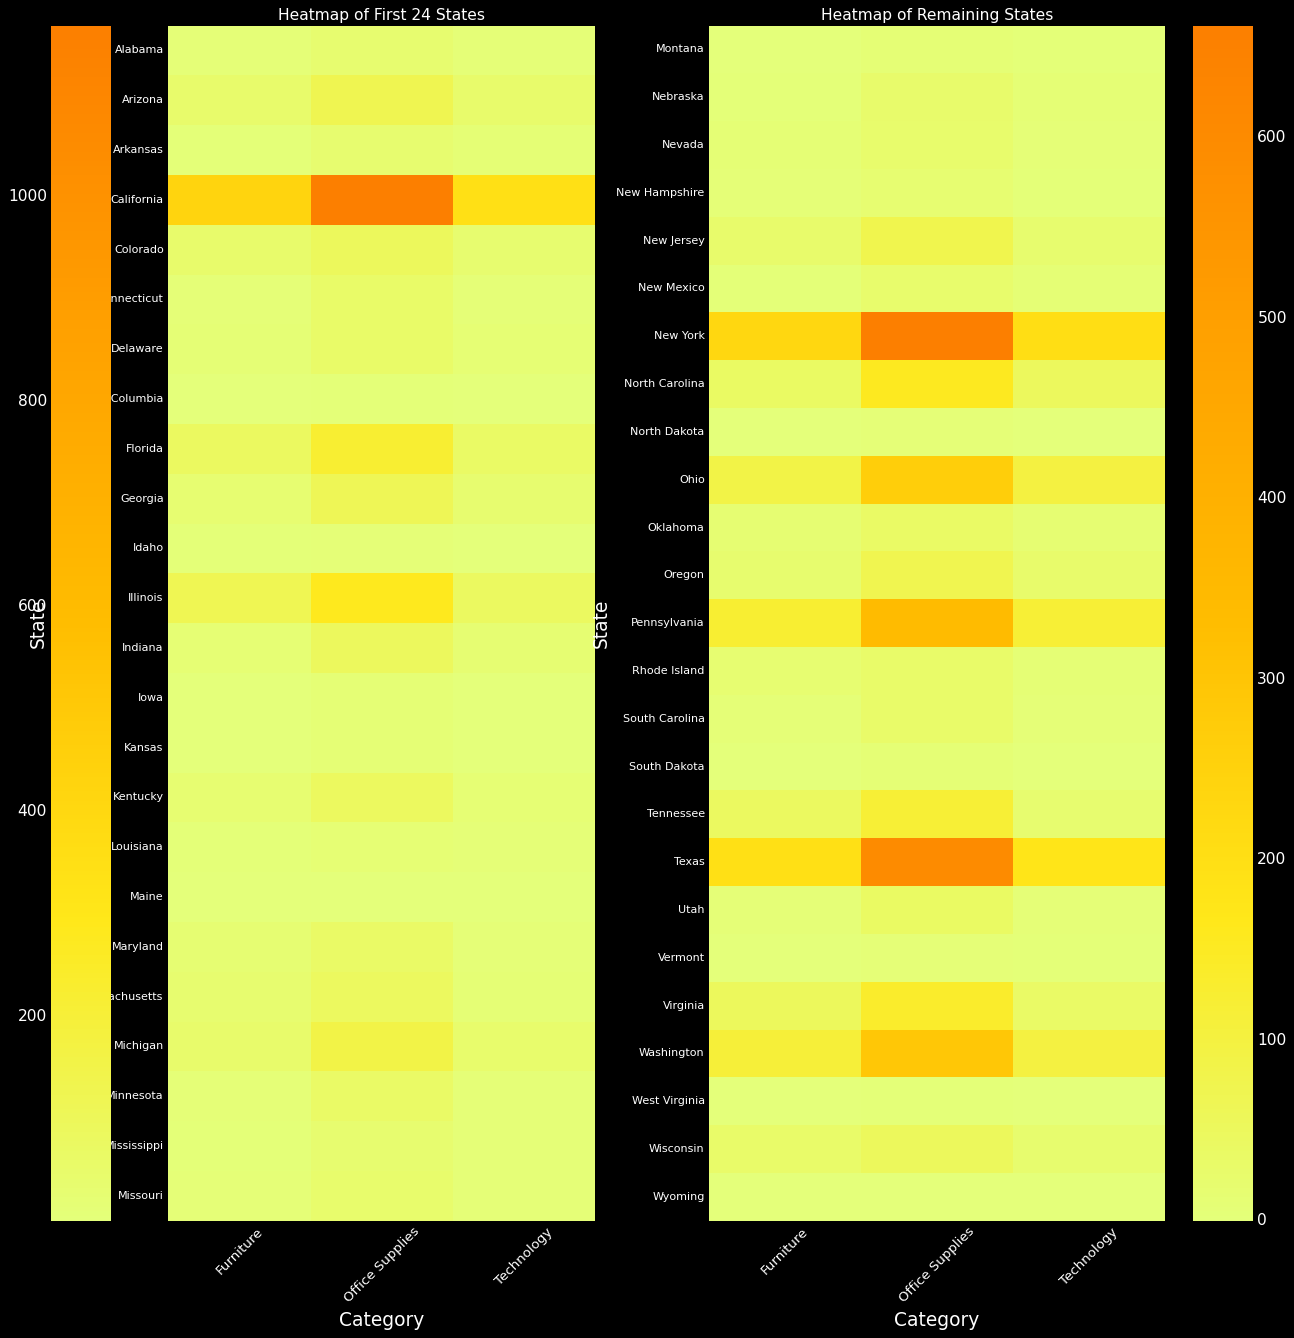

<Figure size 640x1200 with 0 Axes>

In [290]:
crosstable=pd.crosstab(df["State"],df["Category"])
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,18))
plt.figure(figsize=(8,15))
sns.heatmap(crosstable[:24],cmap="Wistia",ax=axes[0],cbar_kws={"location": "left"})
axes[0].set_title("Heatmap of First 24 States", fontsize=14)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].tick_params(axis='x', labelsize=12, rotation=45)
sns.heatmap(crosstable[24:],cmap="Wistia",ax=axes[1])
axes[1].set_title("Heatmap of Remaining States", fontsize=14)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=12, rotation=45)
plt.tight_layout()
plt.show()

C:\Users\21650\AppData\Local\Temp\ipykernel_31876\78619671.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(data=df,y="Region",x="Sales",ci=False,palette="viridis")
C:\Users\21650\AppData\Local\Temp\ipykernel_31876\78619671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,y="Region",x="Sales",ci=False,palette="viridis")


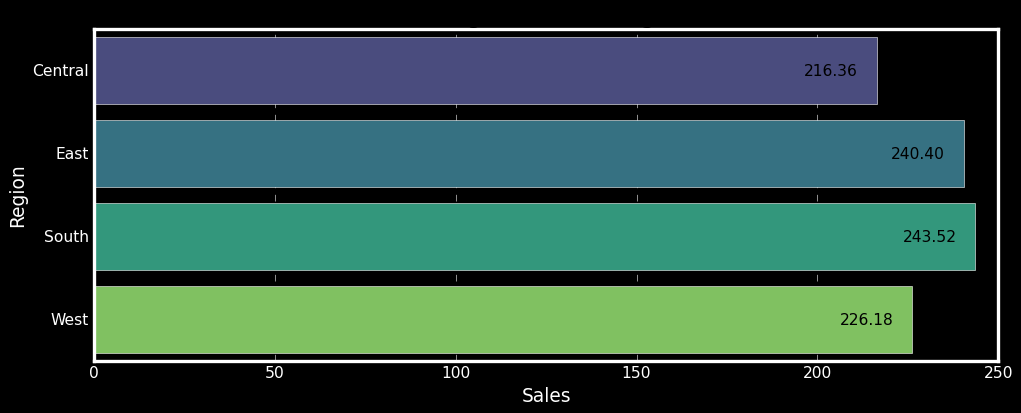

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.barplot(data=df,y="Region",x="Sales",ci=False,palette="viridis")
plt.title("Average Sales Per Region",color="black")
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width-20, y, f'{width:.2f}', va='center',color="black")
plt.show()


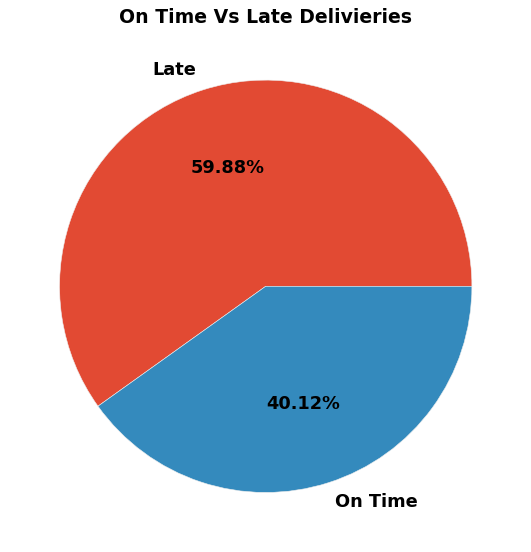

In [310]:
ontime_count=df["On Time"].value_counts()
plt.style.use("ggplot")
plt.figure(figsize=(7,7))
plt.pie(ontime_count,autopct="%.2f%%",labels=["Late","On Time"],textprops={'color':'black','fontsize':16,"weight":'bold'})
plt.title("On Time Vs Late Delivieries",color="black",fontsize=17,weight='bold')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'ship mode VS timely delivery')

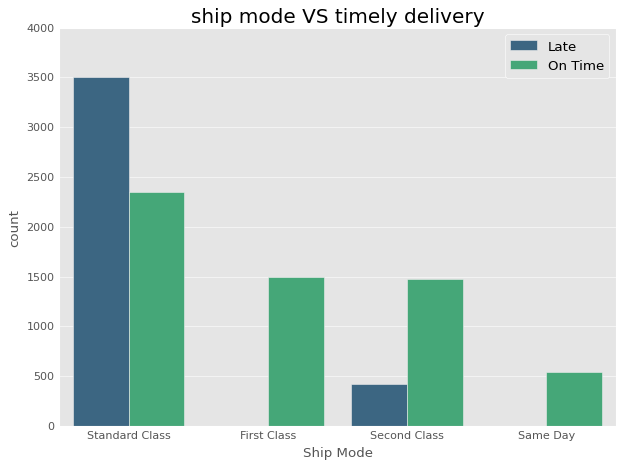

In [334]:
sns.countplot(data=df,x="Ship Mode",hue="On Time",palette="viridis")
legend=plt.legend(labels=["Late","On Time"])
for text in legend.get_texts():
    text.set_color("black")
plt.title("ship mode VS timely delivery",fontsize=18,color="black")

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


Text(0.5, 1.0, 'Customer Segment Countplot')

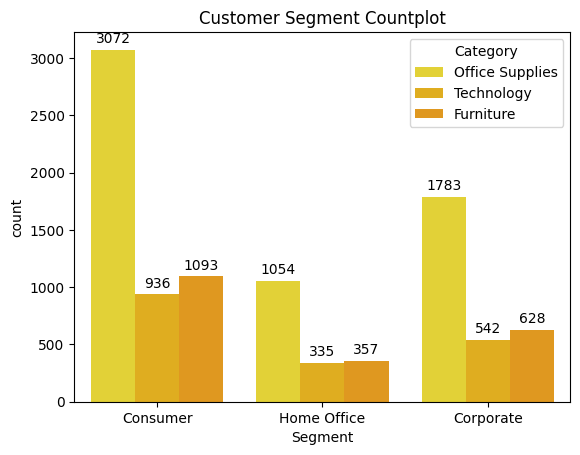

In [17]:
print(df["Segment"].value_counts())
ax=sns.countplot(data=df,x="Segment",hue="Category",palette="Wistia")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title("Customer Segment Countplot")

<Axes: xlabel='On Time', ylabel='Segment'>

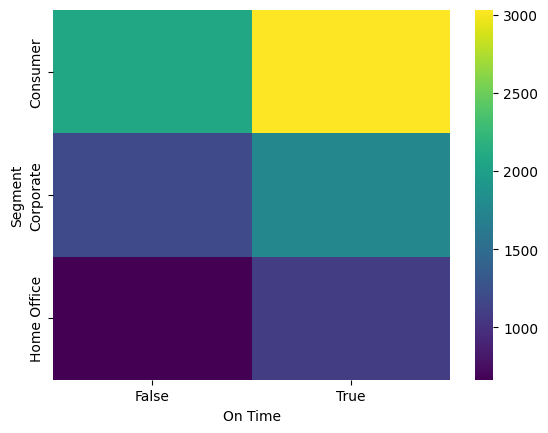

In [17]:
crosstable_seg=pd.crosstab(index=df["Segment"],columns=df["On Time"])
sns.heatmap(data=crosstable_seg,cmap="viridis")

C:\Users\21650\AppData\Local\Temp\ipykernel_5788\3982787552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df,x="Region",palette="viridis",ax=ax[0])
C:\Users\21650\AppData\Local\Temp\ipykernel_5788\3982787552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x1=sns.barplot(data=df,x="Region",y="Sales",ax=ax[1],errorbar=None,palette="coolwarm")


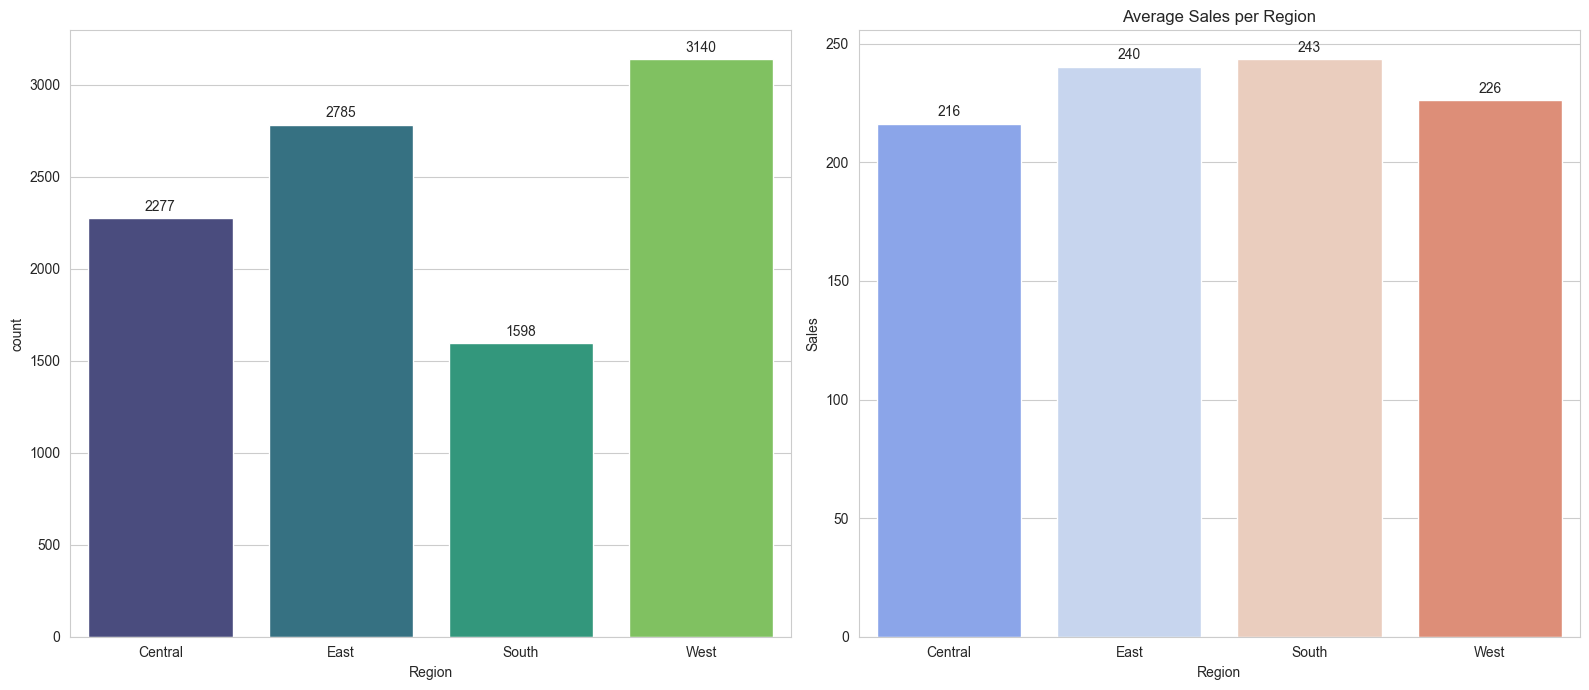

In [ ]:
sns.set_style('whitegrid')
fig, ax=plt.subplots(ncols=2,nrows=1,figsize=(16,7))
x=sns.countplot(data=df,x="Region",palette="viridis",ax=ax[0])
x1=sns.barplot(data=df,x="Region",y="Sales",ax=ax[1],errorbar=None,palette="coolwarm")
plt.title("Average Sales per Region")
# Add value labels
for container in x.containers:
    x.bar_label(container, fmt='%d', label_type='edge', padding=3)
for container in x1.containers:
    x1.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

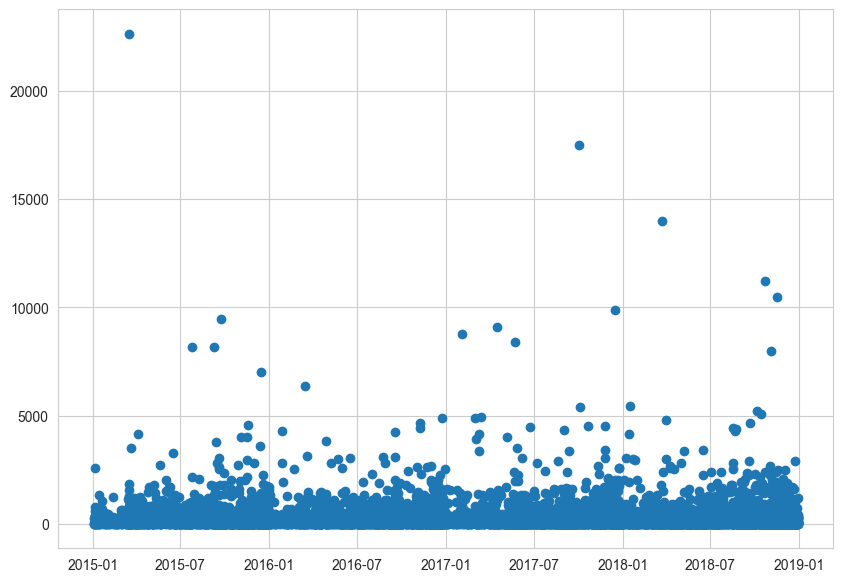

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(data=df,x="Order Date",y="Sales")
plt.show()

In [135]:
weekly_df=df.groupby(pd.Grouper(key="Order Date",freq="W"))["Sales"].sum()
weekly_df=weekly_df.reset_index()

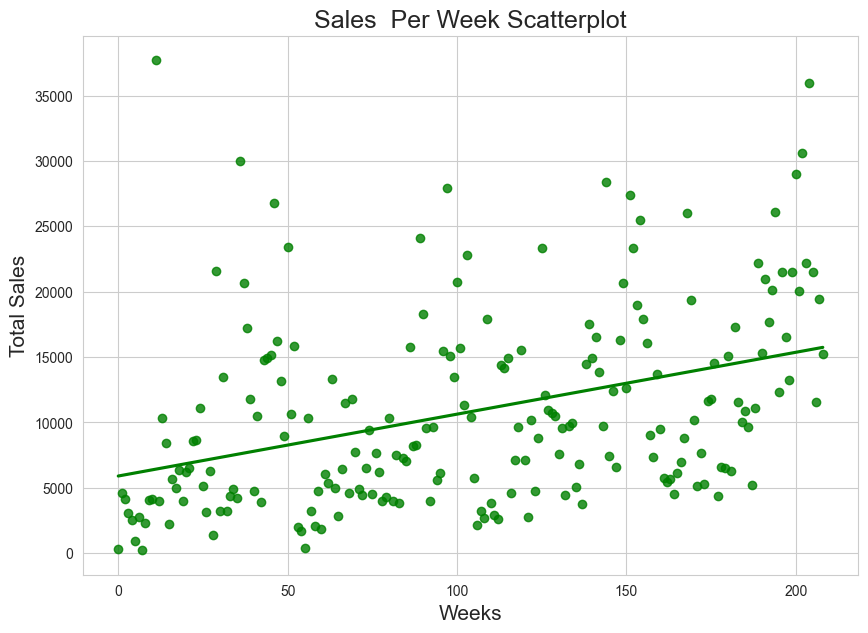

In [120]:
plt.figure(figsize=(10,7))
sns.regplot(data=weekly_df,x=weekly_df.index,y="Sales",color="g",ci=False)
plt.title("Sales  Per Week Scatterplot",fontsize=18)
plt.xlabel("Weeks",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)
plt.show()

<h2><b>Time Series Forecasting<b><h2>

In [136]:
weekly_df.set_index(keys="Order Date",inplace=True,drop=True)
series=weekly_df.squeeze()

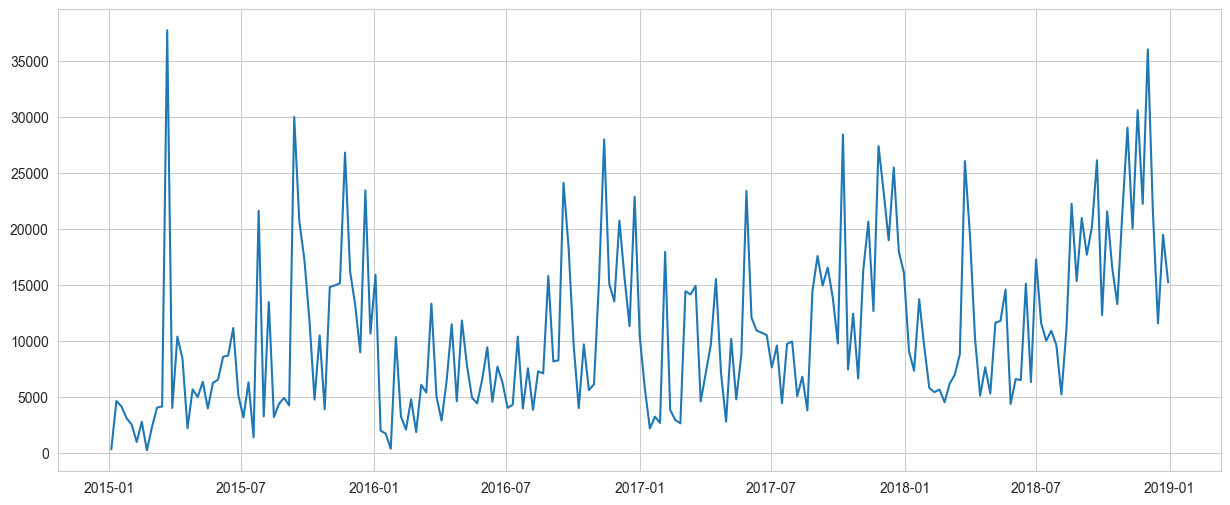

In [122]:
plt.figure(figsize=(15,6))
plt.plot(series.index,series.values)

In [178]:
from statsmodels.tsa.seasonal import STL

# Apply STL directly to the Series
stl = STL(series, period=52)
res = stl.fit()
residual = res.resid

# Detect outliers in the residuals
threshold =residual.std()
outliers = np.abs(residual) > threshold

# Clean the outliers by interpolating
series_cleaned = series.copy()
series_cleaned[outliers] = np.nan
series_cleaned = series_cleaned.interpolate()

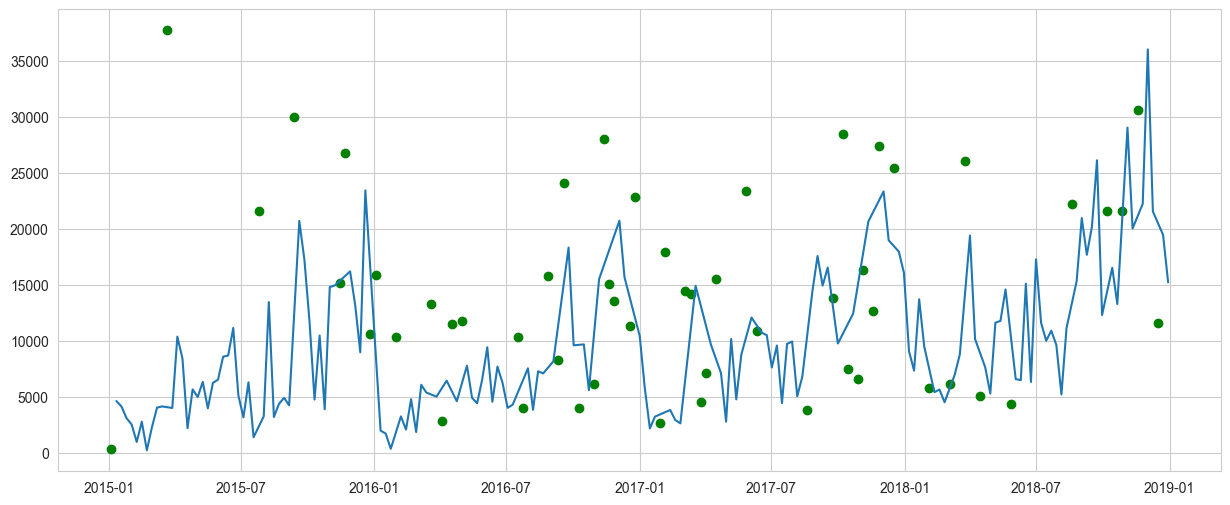

In [173]:
plt.figure(figsize=(15,6))
plt.plot(series_cleaned)
plt.scatter(series.index[outliers],series.values[outliers],color="g")

In [ ]:
series_cleaned=series_cleaned.bfill()

In [182]:
print(f"There are {int(series[outliers].count())} outliers out of {int(series_cleaned.count())} observations.")

There are 53 outliers out of 208 observations.


In [189]:
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss

#adf test
result=adfuller(series_cleaned)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

#kpss test
result2=kpss(series_cleaned)
print(f"KPSS Statistic: {result2[0]}")
print(f"p-value: {result2[1]}")
print("Critical Values:")
for key, value in result2[3].items():
    print(f"   {key}: {value}")

ADF Statistic: -4.185100813065392
p-value: 0.0006982266506192636
Critical Values:
   1%: -3.4623415245233145
   5%: -2.875606128263243
   10%: -2.574267439846904
KPSS Statistic: 1.0747531966217045
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\21650\AppData\Local\Temp\ipykernel_5788\1958551367.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result2=kpss(series_cleaned)


ADF test shows that the series is stationary, while KPSS test says otherwise. We will interpret it as non-stationary since the graph also aids in this assumption.

In [199]:
from scipy.stats import boxcox

# Drop NaNs (can't transform them)
cleaned_nonan = series_cleaned.dropna()

# Box-Cox requires strictly positive values
epsilon = 1e-6
transformed, lambda_ = boxcox(cleaned_nonan + epsilon)

# Now difference the transformed data
first_diff_boxcox = pd.Series(transformed).diff()

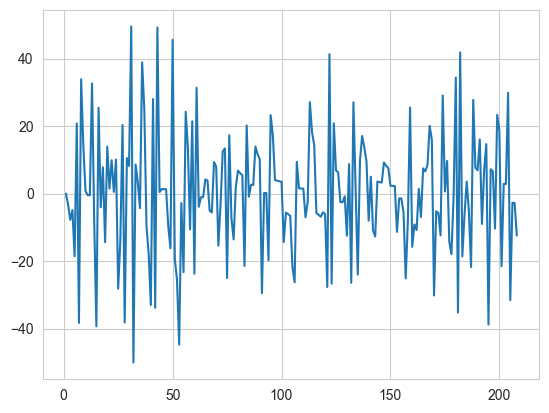

In [200]:
plt.plot(first_diff_boxcox)

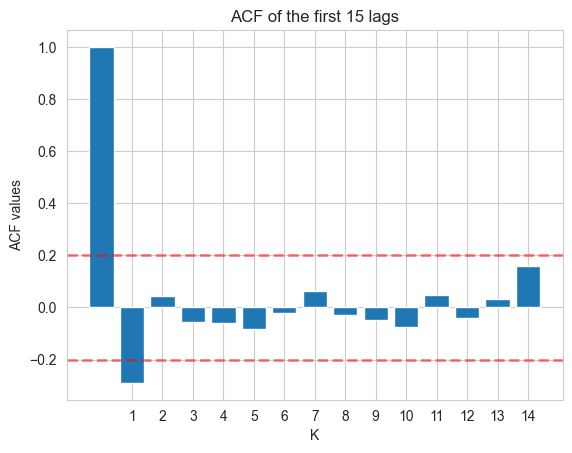

In [224]:
acf_vals=acf(first_diff_boxcox.dropna())
num_lags=15
plt.bar(range(num_lags),acf_vals[:15])
plt.axhline(.2,linestyle="--",color="r",alpha=.5,linewidth=2)
plt.axhline(-.2,linestyle="--",color="r",alpha=.5,linewidth=2)
plt.title(f"ACF of the first {num_lags} lags")
plt.xlabel("K")
plt.xticks(np.arange(1,15,1))
plt.ylabel("ACF values")
plt.show()

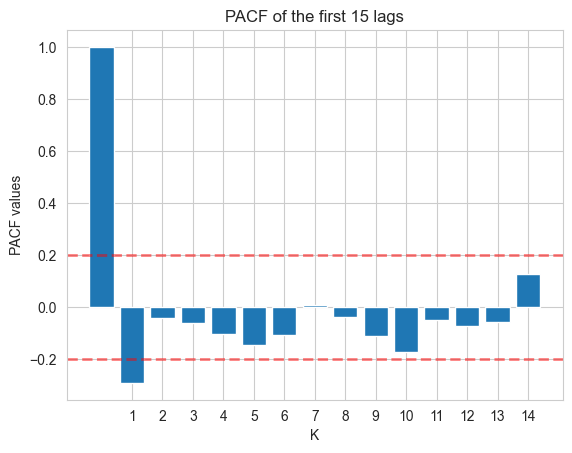

In [225]:
pacf_vals=pacf(first_diff_boxcox.dropna())
num_lags=15
plt.bar(range(num_lags),pacf_vals[:15])
plt.axhline(.2,linestyle="--",color="r",alpha=.5,linewidth=2)
plt.axhline(-.2,linestyle="--",color="r",alpha=.5,linewidth=2)
plt.title(f"PACF of the first {num_lags} lags")
plt.xlabel("K")
plt.xticks(np.arange(1,15,1))
plt.ylabel("PACF values")
plt.show()

In [260]:
#split train and test data
train_data = series_cleaned[:166]
test_data = series_cleaned[166:208]

In [261]:
# define model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,1))

c:\Users\21650\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\21650\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\21650\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [262]:
#fit model
model_fit = model.fit()

In [263]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  166
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1577.862
Date:                Sat, 03 May 2025   AIC                           3161.723
Time:                        13:45:49   BIC                           3171.041
Sample:                    01-04-2015   HQIC                          3165.506
                         - 03-04-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7596      0.066     11.511      0.000       0.630       0.889
ma.L1         -0.9763      0.028    -34.792      0.000      -1.031      -0.921
sigma2      1.176e+07   1.14e-09   1.03e+16      0.0

In [ ]:
# define model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,1))

In [251]:
#fit model
model_fit = model.fit()

In [246]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  166
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -707.332
Date:                Sat, 03 May 2025   AIC                           1422.663
Time:                        13:43:14   BIC                           1435.087
Sample:                             0   HQIC                          1427.706
                                - 166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2663      0.066     -4.010      0.000      -0.396      -0.136
ar.L2         -0.0057      0.079     -0.072      0.942      -0.160       0.148
ma.L1         -0.9999     13.808     -0.072      0.9

In [255]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

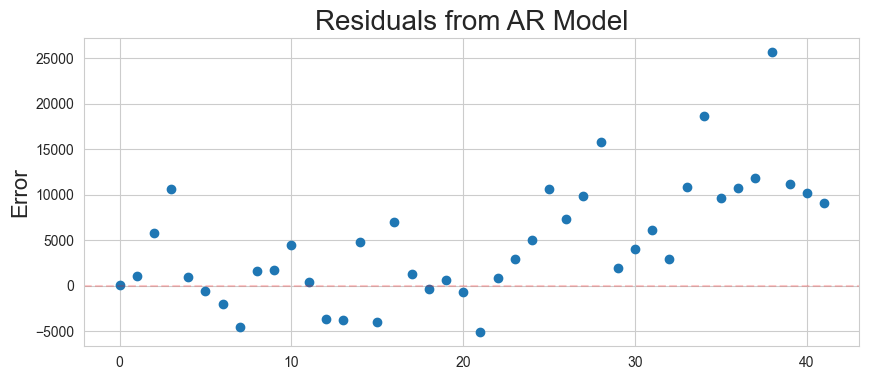

In [264]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions
plt.figure(figsize=(10,4))
plt.scatter(range(42),residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

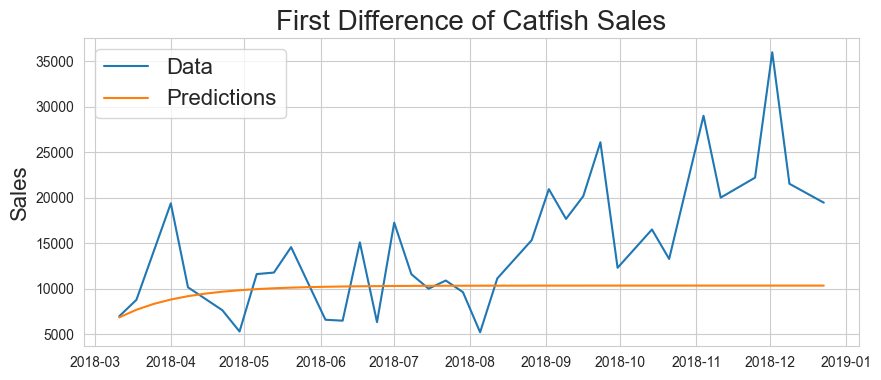

In [265]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)